scollet:jnederlo

In [2]:
from numpy import random
random.standard_exponential((3, 2))

array([[ 0.84990897,  0.18776381],
       [ 1.40306716,  1.39914892],
       [ 3.43224427,  0.14966577]])

In [377]:
import numpy as np
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
arr.reshape((4, 3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [385]:
import numpy as np
from numpy import asarray, sort
def func(n):
    return asarray(np.linspace(0.0, 1.0, n))

# func(5)
func(5).shape

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [1]:
import numpy as np

np.random.randn(10, 12)[0:4, 8:12]

array([[-0.07711037, -1.44310427, -0.00558982, -0.52427997],
       [-2.62352135,  0.67406832, -1.26416288, -0.36220407],
       [-0.57217694,  0.14523726, -0.71206205, -1.32560259],
       [-0.98694416,  0.32829878, -0.14318046,  1.236558  ]])

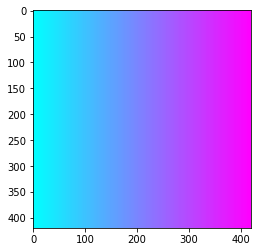

In [390]:
import numpy as np
from numpy import asarray, sort
import matplotlib.pyplot as plt
m, n = 420, 420
def func(n):
    return asarray(np.linspace(0.0, 1.0, n))

arr = func(n)

for row in range(m-1):
    arr = np.row_stack((arr, func(n)))

im = plt.imshow(arr, shape=(m, n), cmap='cool')
plt.show(im)

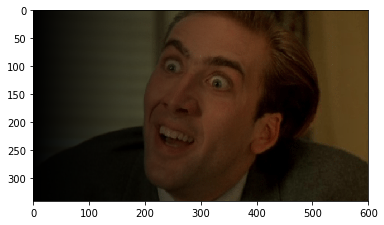

In [394]:
import numpy as np
from numpy import asarray, sort
import matplotlib.pyplot as plt
im = plt.imread('https://i0.wp.com/nerdbastards.com/wp-content/uploads/2014/09/niccage.png?resize=600%2C342')
m, n, o = im.shape
def func(n):
    return asarray(np.linspace(0.0, 1.0, n))

def create_arr():
    arr = []
    for stuff in range(m):
        arr = np.concatenate((arr, func(n)))
    return arr.reshape((m, n))

mat = create_arr()
for i in range(3):
    im[:,:,i] *= mat

img = plt.imshow(im)
plt.show(img)

NORMAL


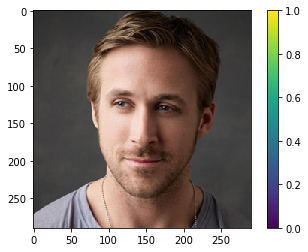

EARLYBIRD


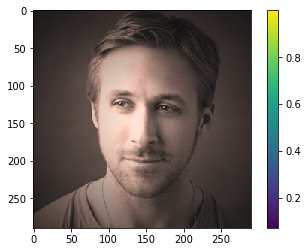

SUTRO


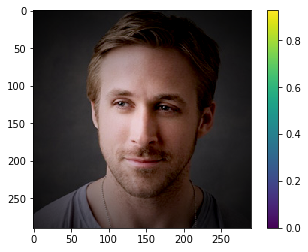

INKWELL


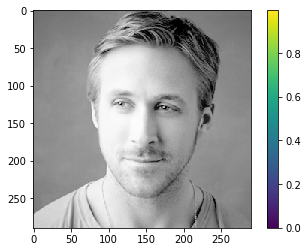

1977


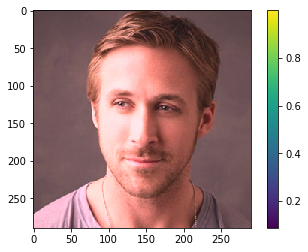

HUDSON


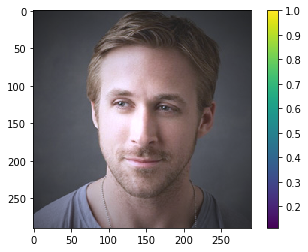

MAYFAIR


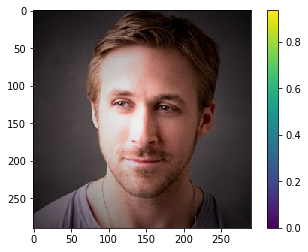

INVERTED


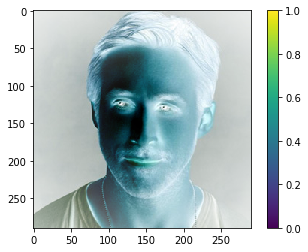

SOLARIZED


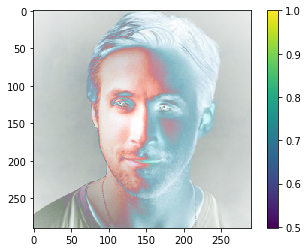

SEPIA


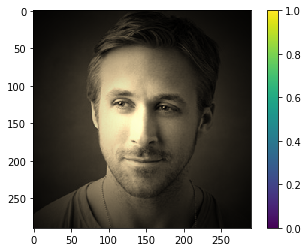

In [398]:
import matplotlib.pyplot as plt
import numpy as np
import sys

'''NORMAL'''

print("NORMAL")

img1 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
nrows, ncols, z = img1.shape
c_row = nrows / 2
c_col = ncols / 2

plt.imshow(img1)
plt.colorbar()
plt.show()

''' Pass in a value scaled up to a 255 color value, and truncate to keep within color range '''
def truncate(val):
    if val < 0:
        return 0
    if val > 255:
        return 1
    return val / 255

''' Adjust the gamma of each pixel'''
def gamma(actualColor, g):
    gamma = g #use gamma between 0.01 - 7.99
    gammaCorrection = 1 / gamma
    R, G, B = actualColor[0]*255, actualColor[1]*255, actualColor[2]*255
    actualColor[0] = truncate(255 * ((R / 255) ** gammaCorrection))
    actualColor[1] = truncate(255 * ((G / 255) ** gammaCorrection))
    actualColor[2] = truncate(255 * ((B / 255) ** gammaCorrection))
    return actualColor

''' Invert the colors of each pixel'''
def colorInversion(actualColor):
    R, G, B = actualColor[0]*255, actualColor[1]*255, actualColor[2]*255
    actualColor[0] = truncate(255 - R)
    actualColor[1] = truncate(255 - G) 
    actualColor[2] = truncate(255 - B)
    return actualColor

''' Solarize each pixel (adjust the colors above or below a threshold)'''
def solarize(actualColor):
    R, G, B = actualColor[0]*255, actualColor[1]*255, actualColor[2]*255
    threshold = 128
    if R < threshold:
        actualColor[0] = truncate(255 - R)
    if G < threshold:
        actualColor[1] = truncate(255 - G) 
    if B < threshold:
        actualColor[2] = truncate(255 - B)
    return actualColor

''' Apply the sepia filter to each pixel'''
def sepia(actualColor):
    R, G, B = actualColor[0]*255, actualColor[1]*255, actualColor[2]*255
    actualColor[0] = truncate((R * 0.393) + (G * 0.769) + (B * 0.189))
    actualColor[1] = truncate((R * 0.349) + (G * 0.686) + (B * 0.168))
    actualColor[2] = truncate((R * 0.272) + (G * 0.534) + (B * 0.131))
    return actualColor

''' Finds the Nearest Color of the Image to reduce it down in color to a smaller color palette.
    Note: imread has already reduced it down to an 8 bit color and scaled the values to between 0 and 1'''
def findNearestColor(actualColor):
    minDist = 3 * ( 255**2 ) + 1
    for i in range(8):
        rDiff = actualColor[0]*255 - i
        gDiff = actualColor[1]*255 - i
        bDiff = actualColor[2]*255 - i
        dist = rDiff**2 + gDiff**2 + bDiff**2
        if dist < minDist:
            minDist = dist
            nearestColor = i / 8
    return nearestColor

''' Converts each pixel to its grayscale componant'''
def grayscale(actualColor):
    R, G, B = actualColor[0], actualColor[1], actualColor[2]
    return 0.299*R + 0.587*G + 0.114*B

''' Change the brightness of each pixel'''
def brightness(actualColor, bright):
    brightness = bright
    R, G, B = actualColor[0]*255, actualColor[1]*255, actualColor[2]*255
    actualColor[0] = truncate(R + brightness)
    actualColor[1] = truncate(G + brightness)
    actualColor[2] = truncate(B + brightness)
    return actualColor

def contrast(actualColor, contrast):
#     contrast = 0.5
    factor = (259*(contrast + 255)) / (255*(259 - contrast))
    R, G, B = actualColor[0]*255, actualColor[1]*255, actualColor[2]*255
    actualColor[0] = truncate(factor*(R - 0) + 0)
    actualColor[1] = truncate(factor*(G - 0) + 0)
    actualColor[2] = truncate(factor*(B - 0) + 0)
    return actualColor

def adjust_color(R, G, B, AC): # value between [0.0 and 1.0)
    R_, G_, B_ = AC[0]*255, AC[1]*255, AC[2]*255
    AC[0] = truncate(R * R_)
    AC[1] = truncate(G * G_)
    AC[2] = truncate(B * B_)
    return AC

def gaussian(AC, scale, x, y):
    return AC * ((2.71828) ** (-((((x-c_col)**2)/((2 * c_col)**scale)) + (((y-c_row)**2)/((2 * c_row)**scale)))))
    
def filter_earlybird(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if sep is True:
                img[x,y] = gaussian(sepia(actualColor), 1.85, x, y)
            if col_adjust is True:
                img[x,y] = gaussian(adjust_color(R, G, B, actualColor), colorScale, x, y)
            if b_adjust is True:
                img[x,y] = gaussian(brightness(actualColor, bright), brightnessScale, x, y)
            if con_adjust is True:
                img[x,y] = contrast(actualColor, con)
            if gamma_adjust is True:
                img[x,y] = gamma(actualColor, gam)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

def filter_sutro(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if b_adjust is True:
                img[x,y] = gaussian(brightness(actualColor, bright), brightnessScale, x, y)
            if con_adjust is True:
                img[x,y] = contrast(actualColor, con)
            if col_adjust is True:
                img[x,y] = gaussian(adjust_color(R, G, B, actualColor), colorScale, x, y)
            if gamma_adjust is True:
                img[x,y] = gamma(actualColor, gam)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if sep is True:
                img[x,y] = sepia(actualColor)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

def filter_inkwell(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if b_adjust is True:
                img[x,y] = gaussian(brightness(actualColor, bright), brightnessScale, x, y)
            if con_adjust is True:
                img[x,y] = contrast(actualColor, con)
            if col_adjust is True:
                img[x,y] = gaussian(adjust_color(R, G, B, actualColor), colorScale, x, y)
            if gamma_adjust is True:
                img[x,y] = gamma(actualColor, gam)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if sep is True:
                img[x,y] = sepia(actualColor)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

def filter_1977(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if b_adjust is True:
                img[x,y] = brightness(actualColor, bright)
            if con_adjust is True:
                img[x,y] = contrast(actualColor, con)
            if col_adjust is True:
                img[x,y] = adjust_color(R, G, B, actualColor)
            if gamma_adjust is True:
                img[x,y] = gamma(actualColor, gam)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if sep is True:
                img[x,y] = sepia(actualColor)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

def filter_hudson(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if col_adjust is True:
                img[x,y] = adjust_color(R, G, B, actualColor)
            if gamma_adjust is True:
                img[x,y] = gaussian(gamma(actualColor, gam), gammaScale, x, y)
            if b_adjust is True:
                img[x,y] = gaussian(brightness(actualColor, bright), brightnessScale, x, y)
            if con_adjust is True:
                img[x,y] = contrast(actualColor, con)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if sep is True:
                img[x,y] = sepia(actualColor)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

def filter_mayfair(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if col_adjust is True:
                img[x,y] = gaussian(adjust_color(R, G, B, actualColor), colorScale, x, y)
            if gamma_adjust is True:
                img[x,y] = gaussian(gamma(actualColor, gam), gammaScale, x, y)
            if b_adjust is True:
                img[x,y] = gaussian(brightness(actualColor, bright), brightnessScale, x, y)
            if con_adjust is True:
                img[x,y] = gaussian(contrast(actualColor, con), contrastScale, x, y)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if sep is True:
                img[x,y] = gaussian(sepia(actualColor), 1.8, x, y)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

def filter_generic(img,
            bright,
            con,
            gam,
            b_adjust=True,
            con_adjust=True,
            col_adjust=True,
            gamma_adjust=False,
            gScale=False,
            sep=False,
            cInv=False,
            sol=False,
            R=1.0,
            G=1.0,
            B=1.0,
            colorScale=2.50,
            brightnessScale=2.50,
            contrastScale=2.50,
            gammaScale=2.50):
    for y in range(nrows):
        for x in range(ncols):
            actualColor = img[x,y]
            if col_adjust is True:
                img[x,y] = gaussian(adjust_color(R, G, B, actualColor), colorScale, x, y)
            if gamma_adjust is True:
                img[x,y] = gaussian(gamma(actualColor, gam), gammaScale, x, y)
            if b_adjust is True:
                img[x,y] = gaussian(brightness(actualColor, bright), brightnessScale, x, y)
            if con_adjust is True:
                img[x,y] = gaussian(contrast(actualColor, con), contrastScale, x, y)
            if gScale is True:
                img[x,y] = grayscale(actualColor)
            if sep is True:
                img[x,y] = gaussian(sepia(actualColor), 1.8, x, y)
            if cInv is True:
                img[x,y] = colorInversion(actualColor)
            if sol is True:
                img[x,y] = solarize(actualColor)
    return img

''' FILTERS '''
''' 
-:- filter arguments listed below. Most have preset defaults so you don't have to specify
each individual setting -:- '''

''' (image, brightness, contrast, gamma, brightnessAdjust, contrastAdjust, colorAdjust, gammaAdjust, grayscale, sepia, colorInversion, solarize, R, G, B, colorScale, brightnessScale, contrastScale, gammaScale) '''

'''EARLYBIRD'''

print("EARLYBIRD")

img1 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img1 = filter_earlybird(img1, bright=17, con=3, gam=1.05, col_adjust=True, gamma_adjust=True, sep=True, R=0.92, G=0.80, B=0.92, colorScale=2.10, brightnessScale=2.15)

plt.imshow(img1)
plt.colorbar()
plt.show()

'''SUTRO'''

print("SUTRO")

img2 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img2 = filter_sutro(img2, bright=-30, con=16, gam=1.35, col_adjust=True, gamma_adjust=True, R=0.93, G=0.89, B=0.96, colorScale=2.20, brightnessScale=1.75)

plt.imshow(img2)
plt.colorbar()
plt.show()

'''INKWELL'''

print("INKWELL")

img3 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img3 = filter_inkwell(img3, bright=-15, con=25, gam=2.65, gamma_adjust=True, gScale=True, brightnessScale=2.10)

plt.imshow(img3)
plt.colorbar()
plt.show()

'''1977'''

print("1977")

img4 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img4 = filter_1977(img4, 20, 10, 1.05, True, True, True, True, False, False, False, False, R=1.2, G=.9, B=.95, colorScale=2.7, contrastScale=2.7, brightnessScale=2.7)

plt.imshow(img4)
plt.colorbar()
plt.show()

'''HUDSON'''

print("HUDSON")

img5 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img5 = filter_hudson(img5, 35, 10, 1, True, True, True, True, False, False, False, False, R=.85, G=.9, B=1.05, colorScale=2.4, contrastScale=2.7, brightnessScale=2.0, gammaScale=2.0)

plt.imshow(img5)
plt.colorbar()
plt.show()

'''MAYFAIR'''

print("MAYFAIR")

img6 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img6 = filter_mayfair(img6, -20, 2, 1.3, True, True, True, True, False, False, False, False, R=1.32, G=1.18, B=1.25, colorScale=2.0, contrastScale=2.5, brightnessScale=2.0, gammaScale=2.1)

plt.imshow(img6)
plt.colorbar()
plt.show()

'''INVERTED'''

print("INVERTED")

img7 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img7 = filter_generic(img7, 0, 0, 1.0, cInv=True, R=1.32, G=1.18, B=1.25, colorScale=2.0, contrastScale=2.5, brightnessScale=2.0, gammaScale=2.1)

plt.imshow(img7)
plt.colorbar()
plt.show()

'''SOLARIZED'''

print("SOLARIZED")

img8 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img8 = filter_generic(img8, 0, 0, 1.0, sol=True, R=1.32, G=1.18, B=1.25, colorScale=2.0, contrastScale=2.5, brightnessScale=2.0, gammaScale=2.1)

plt.imshow(img8)
plt.colorbar()
plt.show()

'''SEPIA'''

print("SEPIA")

img9 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
img9 = filter_generic(img9, 0, 0, 1.0, sep=True, colorScale=2.0, contrastScale=2.5, brightnessScale=2.0, gammaScale=2.1)

plt.imshow(img9)
plt.colorbar()
plt.show()